# Time Series Project

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Project-instructions" data-toc-modified-id="Project-instructions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Project instructions</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Resampling-time-intervals" data-toc-modified-id="Resampling-time-intervals-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Resampling time intervals</a></span></li></ul></li><li><span><a href="#Missing-values-check" data-toc-modified-id="Missing-values-check-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing values check</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Stationarty-&amp;-seasonality" data-toc-modified-id="Stationarty-&amp;-seasonality-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Stationarty &amp; seasonality</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Features-preparation" data-toc-modified-id="Features-preparation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Features preparation</a></span><ul class="toc-item"><li><span><a href="#Adding-new-features" data-toc-modified-id="Adding-new-features-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Adding new features</a></span></li><li><span><a href="#Adding-selected-lag-features" data-toc-modified-id="Adding-selected-lag-features-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Adding selected lag features</a></span></li></ul></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Training-models-with-different-hyperparameters" data-toc-modified-id="Training-models-with-different-hyperparameters-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Training models with different hyperparameters</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.3.4.1"><span class="toc-item-num">6.3.4.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-6.3.4.2"><span class="toc-item-num">6.3.4.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6.3.4.3"><span class="toc-item-num">6.3.4.3&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Testing</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import catboost as cb
import lightgbm as lgb
from xgboost.sklearn import XGBRegressor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(20, 7))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
def load_data(file_name, parse_dates=None, dtype=None, sep=','):
    df=''
    
    try:
        df=pd.read_csv('datasets/{}'.format(file_name), parse_dates=parse_dates, dtype=dtype, sep=sep)
    except:
        df=pd.read_csv('/datasets/{}'.format(file_name), parse_dates=parse_dates, dtype=dtype, sep=sep)
        
    return df

In [34]:
df=load_data('taxi.csv', parse_dates=['datetime'])
df.head(2)
df.info()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


As a time series, the time should be set as an index, and to be sorted out.

In [35]:
df=df.set_index('datetime')
df=df.sort_index()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


#### Resampling time intervals

Data is provided in intervals of 10 minutes, which is resampled to work as a 1 hour interval.

In [36]:
df=df.resample('1H').sum()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Missing values check

In [37]:
df.isnull().sum()

num_orders    0
dtype: int64

There are no missing values.

## Analysis

### Stationarty & seasonality

Checking if the time series is stationary.  
A stationary time series is one that shows no trends, or seasonality.

In [38]:
fig = px.line(df['num_orders'], x=df.index, y="num_orders", title='Taxi orders in 6 months')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of taxi orders')

Just looking at the graph, it appears that up until June, the data is stationary, but then a trend begins.  
It's hard to find seasonality in such a short period, but a taxi company must have a better season during the summer, when people go on vacations.  

A trend might affect the final prediction results, since the test data is taken from the end, where the data is trending. 

By resampling the data in 1 day intervals, the graph becomes smooth and shows that there is a trend all the way, but the trend gets significantly higher after June.

In [39]:
df_1d=df.resample('1D').mean()

fig = px.line(df_1d['num_orders'], x=df_1d.index, y="num_orders", title='Daily taxi orders in 6 months')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of taxi orders')

Showing the monthly data as a box plot graph.

In [40]:
df['month'] = df.index.month

fig = px.box(df, x="month", y="num_orders", color="month")
fig.update_layout(xaxis_title='Month', yaxis_title='Number of taxi orders')

There is a trend in the data, therefore it is not stationary.  
I shift the data back for 24 hours because each day is the same as the day before. The trend/daily seasonality of the original dataset is removed when the shifted data is subtracted from the original.  

Making the data stationary, and drawing the graph 'Daily taxi orders in 6 months' using the stationary data.

In [41]:
df_stationary = (df-df.shift(24)).dropna()

fig = px.line(
    df_stationary['num_orders'], x=df_stationary.index, 
    y="num_orders", title='Stationary data out of daily number of taxi orders'
)
fig.update_layout(xaxis_title='Month', yaxis_title='Number of taxi orders')

A Partial Autocorrelation Function (PACF) shows the correlation level between a current value and a previous value 
without taking into account other values between those two values.

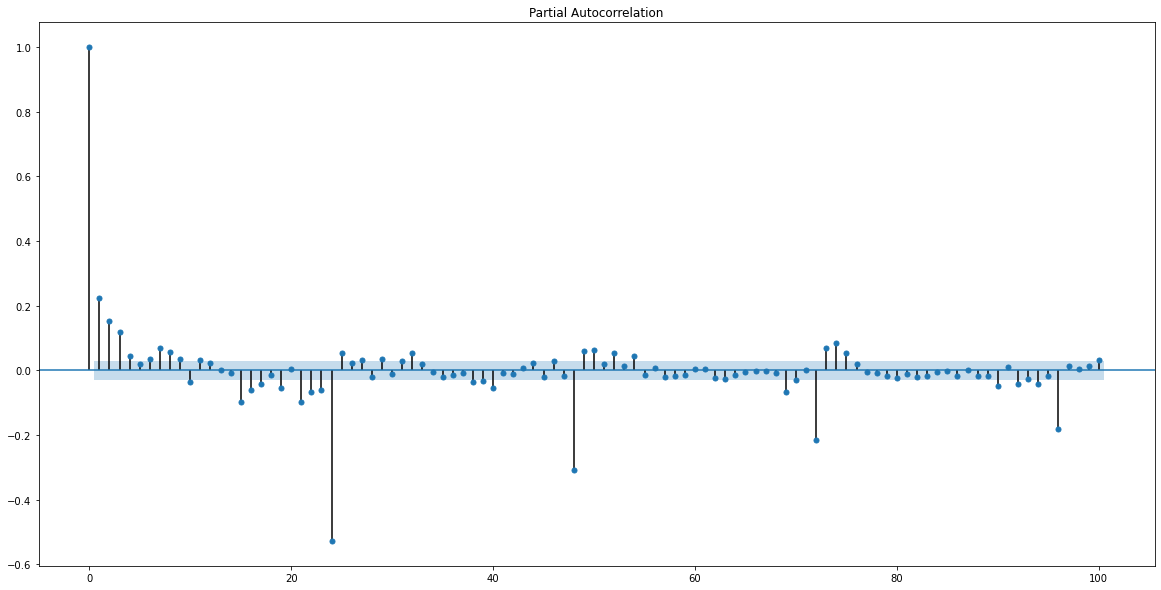

In [42]:
plt.rc('figure', figsize=(20, 10))
plot_pacf(df_stationary['num_orders'], lags=100, method='ywm');

Up until the $24^{th}$ value, the current value has a strong correlation with previous values.

An Auto Correlation Function (ACF) shows the correlation level between a current value and a previous value while taking into account all other values between those two values, unlike the PACF that removes those values.  
Statistical significance value is indicated by a dot above the blue area.

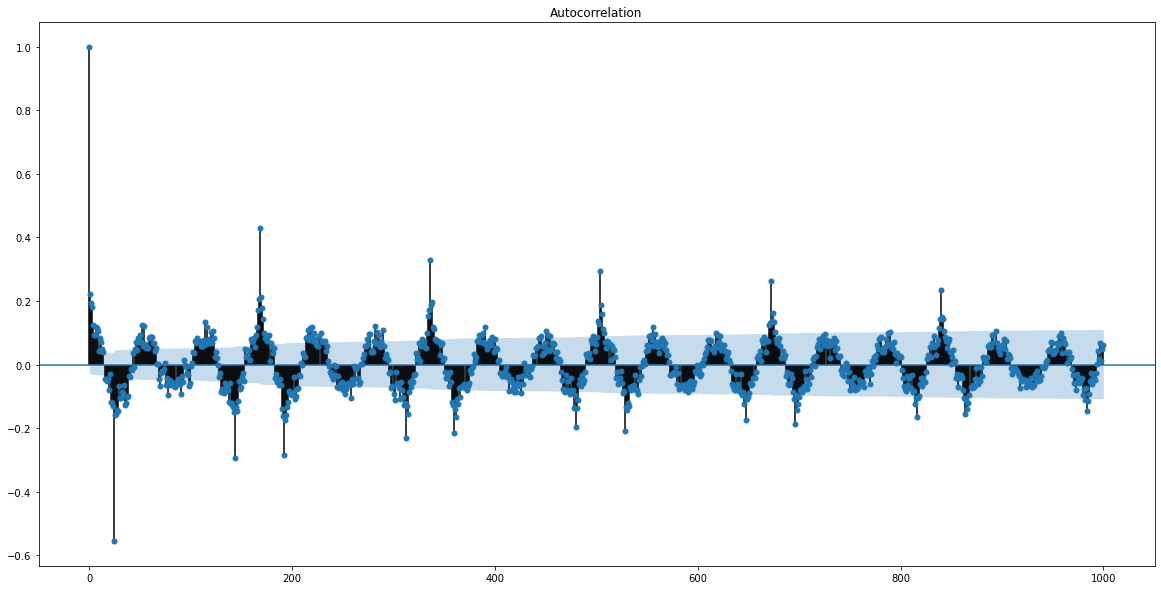

In [43]:
plot_acf(df_stationary['num_orders'].dropna(), lags=1000);

There are a lot of lagged features correlated to the current value. Up until 300 lags almost all values have statistical significance, but there are picks of values that have much stronger correlation. in the ACF graph showing correlation of 1000 lags, there are 18 picks like that.

## Training

### Features preparation

#### Adding new features

A prediction model's accuracy can be improved by adding features.

In [44]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour

#### Adding selected lag features

Improve the accuracy of machine learning models by adding lag and rolling features.  
By adding 1000 lags, I select the lags which have the strongest correlation. Only the selected features will be included in the main dataset.  
Using the `acf()` and `pacf()` I'm getting the correlation score, and by looking at the related graphs above, I decided to use a threshold of 0.2 for the ACF, and 0.1 for the PACF.

In [45]:
arr_pacf = pacf(df_stationary['num_orders'], nlags=50)
arr_acf = acf(df_stationary['num_orders'], nlags=1000, fft=True)

Building a dataframe from the results, sorting it by absolut values

In [46]:
df_pacf=pd.DataFrame({"pacf": arr_pacf})
df_pacf['pacf']=df_pacf['pacf'].abs()
df_pacf=df_pacf.sort_values('pacf', ascending=False)
df_pacf.head()

,pacf
0,1.000000
24,0.531075
48,0.313489
1,0.223447
2,0.152225


In [47]:
df_acf=pd.DataFrame({"acf": arr_acf})
df_acf['acf']=df_acf['acf'].abs()
df_acf=df_acf.sort_values('acf', ascending=False)
df_acf.head()

,acf
0,1.000000
24,0.555935
168,0.429665
336,0.328612
504,0.293531


Selecting the features that got the highest scores for the correlation's test.

In [48]:
arr1=df_acf.query('acf>0.2').reset_index()[1:]['index'].values
arr2=df_pacf.query('pacf>0.1').reset_index()[1:]['index'].values

arr_selected_lagged_features=np.concatenate((arr2, arr1))
arr_selected_lagged_features.sort()

Adding the features based on the lagged features that got the highest correlation score

In [49]:
for lag in arr_selected_lagged_features:
    df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

df=df.dropna()

In [50]:
df.head()

,num_orders,month,year,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_24,...,lag_168,lag_169,lag_192,lag_312,lag_336,lag_360,lag_504,lag_528,lag_672,lag_840
datetime,,,,,,,,,,,,,,,,,,,,,
2018-04-05 00:00:00,114,4,2018,5,3,0,90.0,79.0,56.0,77.0,...,112.0,105.0,95.0,90.0,139.0,71.0,123.0,84.0,143.0,124.0
2018-04-05 01:00:00,53,4,2018,5,3,1,114.0,90.0,79.0,34.0,...,80.0,112.0,57.0,92.0,101.0,85.0,85.0,72.0,78.0,85.0
2018-04-05 02:00:00,54,4,2018,5,3,2,53.0,114.0,90.0,40.0,...,49.0,80.0,51.0,71.0,28.0,35.0,55.0,39.0,65.0,71.0
2018-04-05 03:00:00,64,4,2018,5,3,3,54.0,53.0,114.0,68.0,...,49.0,49.0,55.0,42.0,75.0,51.0,42.0,57.0,68.0,66.0
2018-04-05 04:00:00,50,4,2018,5,3,4,64.0,54.0,53.0,28.0,...,58.0,49.0,35.0,40.0,25.0,21.0,15.0,21.0,60.0,43.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3576 entries, 2018-04-05 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num_orders  3576 non-null   int64  
 1   month       3576 non-null   int64  
 2   year        3576 non-null   int64  
 3   day         3576 non-null   int64  
 4   dayofweek   3576 non-null   int64  
 5   hour        3576 non-null   int64  
 6   lag_1       3576 non-null   float64
 7   lag_2       3576 non-null   float64
 8   lag_3       3576 non-null   float64
 9   lag_24      3576 non-null   float64
 10  lag_48      3576 non-null   float64
 11  lag_144     3576 non-null   float64
 12  lag_167     3576 non-null   float64
 13  lag_168     3576 non-null   float64
 14  lag_169     3576 non-null   float64
 15  lag_192     3576 non-null   float64
 16  lag_312     3576 non-null   float64
 17  lag_336     3576 non-null   float64
 18  lag_360     3576 non-nul

### Splitting the data

In [52]:
X=df.drop('num_orders', axis=1)
y=df['num_orders']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=12345, shuffle=False
)

### Training models with different hyperparameters

In [53]:
def RMSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

RMSE_scorer=make_scorer(RMSE, greater_is_better=False)

In [54]:
def search_best_hyper_params(model, params, X, y):
    
    tscv = TimeSeriesSplit(n_splits=10)
    clf=GridSearchCV(model, param_grid=params, scoring=RMSE_scorer, cv=tscv)
    clf.fit(X, y)
    return clf.best_score_*(-1), clf.best_params_

#### Linear Regression

In [55]:
%%time
lr_model=LinearRegression()
search_best_hyper_params(lr_model, {}, X_train, y_train)

Wall time: 94 ms


(22.423364290080777, {})

While the RMSE threshold was set at 48, the Linear Regression returned a much better score of 22.42.

#### Decision Tree

In [56]:
%%time
search_best_hyper_params(
    DecisionTreeRegressor(random_state=12345), 
    {
        'max_features':['auto','log2','sqrt',None],
        'max_leaf_nodes':[None,10,90],
        'max_depth':[2, 3, 4]
    },
    X_train, y_train
)

Wall time: 2.62 s


(26.250546433567564,
 {'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 90})

The Desicion Tree performed worse than the Linear Regression, returning a score of 26.25.

#### Random Forest

In [57]:
%%time
search_best_hyper_params(
    RandomForestRegressor(random_state=12345), 
    {'n_estimators':[20, 80, 200], 
     'max_depth':[3, 6, 8, 10] },
    X_train, y_train
)

Wall time: 1min 37s


(22.684643600726044, {'max_depth': 8, 'n_estimators': 80})

The Random Forest performed slightly worse than the Linear Regression, returning a score of 22.68.

#### Gradient Boosting

Running the same data using Gradient Boosting algorithms.

##### CatBoost

In [58]:
%%time
search_best_hyper_params(
    cb.CatBoostRegressor(
        loss_function='RMSE', random_seed = 12345, verbose=False
    ), 
    {'iterations': [100, 200, 500],
     'learning_rate': [0.03, 0.1],
     'depth': [2, 5, 8]
    },
    X_train, y_train
)

Wall time: 3min 54s


(22.24604867832627, {'depth': 5, 'iterations': 200, 'learning_rate': 0.03})

The CatBoost performed slightly better than the Linear Regression, returning a score of 22.24 (compared to 22.42 of the Linear Regression).

##### LightGBM

In [59]:
%%time
search_best_hyper_params(
    lgb.LGBMRegressor(random_state=12345), 
    {
        'learning_rate': [0.03, 0.1],
        'max_depth': [2, 5, 8],
        'n_estimators': [100, 200, 500]
    },
    X_train, y_train
)

Wall time: 28.5 s


(22.481830956896836,
 {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 200})

The LightGBM performed slightly worse than the CatBoost, returning a score of 22.48.

##### XGBoost

In [60]:
%%time

search_best_hyper_params(
    XGBRegressor(random_state=12345), 
    {
      'nthread':[4],
      'learning_rate': [0.03, 0.1],
      'max_depth': [2, 8],
      'n_estimators': [100, 500]
    },
    X_train, y_train
)

Wall time: 1min 29s


(22.792869283345745,
 {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 500, 'nthread': 4})

The XGBoost performed slightly worse than the CatBoost, returning a score of 22.79.

Since the CatBoost did the best, I want to measure times using the best hyperparameter.

In [61]:
%%time
search_best_hyper_params(
    cb.CatBoostRegressor(
        loss_function='RMSE', random_seed = 12345, verbose=False
    ), 
    {'iterations': [200],
     'learning_rate': [0.03],
     'depth': [5]
    },
    X_train, y_train
)

Wall time: 7.02 s


(22.24604867832627, {'depth': 5, 'iterations': 200, 'learning_rate': 0.03})

Both Linear Regression and CatBoost got similar RMSE score. The time measurement was much faster for the Lineal Regression 94ms compared to 7.02s.

## Testing

Since both Linear Regression and CatBoost got similar RMSE score, I'll test them both.

### CatBoost

In [62]:
%%time
cb_model=cb.CatBoostRegressor(
        loss_function='RMSE', random_seed = 12345, verbose=False, 
        iterations=200, depth=5, learning_rate=0.03
    )
cb_model.fit(X_train, y_train)

cb_predict=cb_model.predict(X_test)
RMSE(y_test, cb_predict)

Wall time: 798 ms


38.90145148886542

### Linear Regression

In [63]:
%%time
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

lr_predict=lr_model.predict(X_test)
RMSE(y_test, lr_predict)

Wall time: 0 ns


34.69471015385288

## Conclusion

I found 2 models that gave similar results, and both ran very quickly. The most suitable model for the job is Linear Regression as it performed better on the test set in both RMSE score (34.69 compared to 38.9), as well as in learning-predicting time (0ns compared to 798ms). The final RMSE score was below the desired threshold (48).  
Both models performed significantly worse than during training. A possible explanation is that the gradient of the trend is getting steeper since June. It may be due to seasonality, but there are not enough data to confirm that.


# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48